<a href="https://colab.research.google.com/github/Djhoud/Dashboard/blob/master/titanic_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train.csv
Informações do dataset de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Valores nulos por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch          

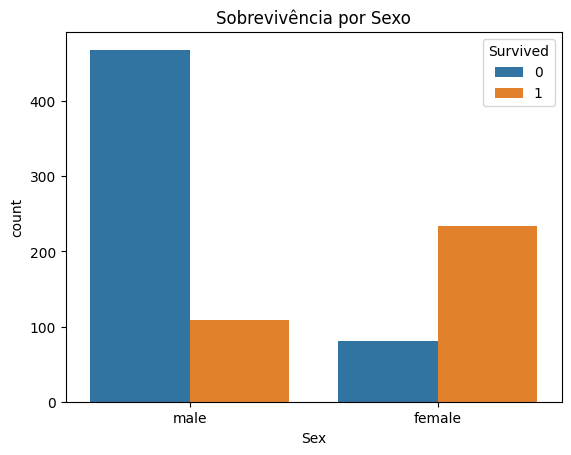

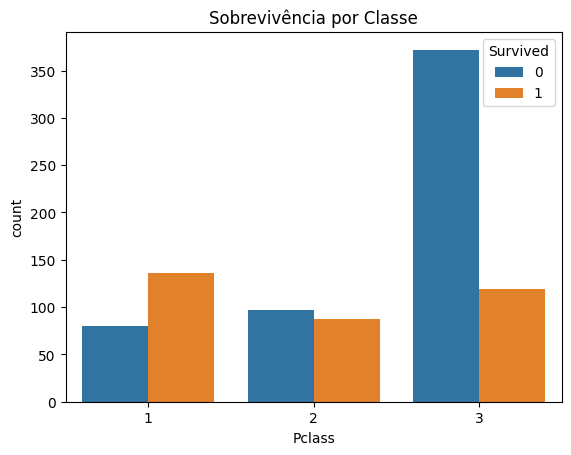

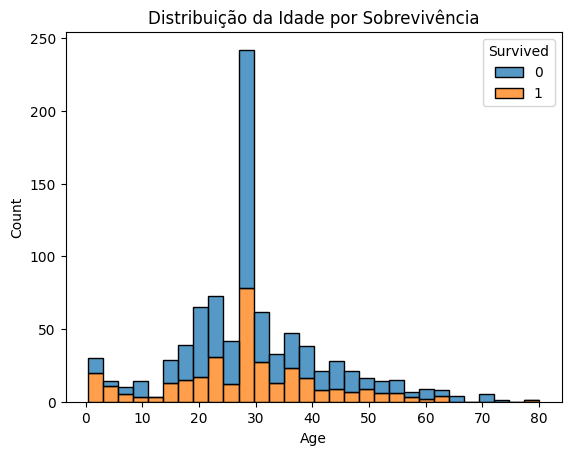

In [4]:
# Titanic - Preparação, Tratamento e Análise de Dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Carregar os dados
uploaded = files.upload()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exibir informações gerais
print("Informações do dataset de treino:")
print(train.info())
print("\nValores nulos por coluna:")
print(train.isnull().sum())

# Tratamento de valores nulos (exemplo inicial)
train["Age"] = train["Age"].fillna(train["Age"].median())   # preenchendo idade com a mediana
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])  # preenchendo embarque com o mais comum
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

# Conversão de variáveis categóricas
train["Sex_binario"] = train["Sex"].map({"female": 1, "male": 0})
test["Sex_binario"] = test["Sex"].map({"female": 1, "male": 0})

# Exemplo de correlação
print("\nCorrelação com a sobrevivência:")
print(train[["Survived", "Sex_binario", "Age", "Pclass", "SibSp", "Parch", "Fare"]].corr())

# Visualizações
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Sobrevivência por Sexo")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Sobrevivência por Classe")
plt.show()

sns.histplot(train, x="Age", hue="Survived", multiple="stack")
plt.title("Distribuição da Idade por Sobrevivência")
plt.show()
